# Sentiment Analysis: Large Movie Review Dataset


This project is related to NLP. As you may already know, the most important and hardest part of an NLP project is pre-processing, which is why we are going to focus on that.

Regarding the data, we are not going to have a __csv file__, that would be too easy :) instead we are going to download the data from [AI Stanford Dataset](https://ai.stanford.edu/~amaas/data/sentiment/). When you download them you will notice that their format is text reviews, so you will have to work a little there to be able to use and process them. This is a dataset for __binary sentiment classification__.

Basically a basic sentiment analysis problem, as in this case, consists of a classification problem, where the possible output y are: `positive` and `negative`. Which indicates, if the review of a movie speaks positively or negatively. In our case it is a binary problem, but one could have many more 'feelings' tagged and thus allow a more granular analysis.


---
## 1. Get the data

#### Download the data and process it in order to obtain:

* `X_train:` list with x for training.
* `y_train:` list with y for training.
* `X_test:` list with x for testing.
* `y_test:` list with y for testing.

`Notes:` Use the target column as `positive`, that way the positive value will be indicated with a value of `1` and negative with a value of `0`. In this case, a split train/test is not necessary because the original data is already separated.

In [ ]:
import numpy as np
import pandas as pd
import os
import text_normalizer
import evaluation
import pickle
import nltk
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!python -m spacy download en

In [3]:
# !python -m wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

# !tar -xvf aclImdb_v1.tar.gz

In [4]:
def split_train_test(path):
    list_reviews = []
    list_labels = []

    # Loop through all the directories and files in the path.
    for dir, _, reviews in os.walk(path):
        # Check if the directory name contains either neg or pos.
        label = 0 if 'neg' in dir else 1 if 'pos' in dir else None
        
        # Read the content of each file
        if label is not None:
            for review in reviews:
                file_path = os.path.join(dir, review) # Get the file path.
                with open(file_path, encoding = 'UTF-8') as f:
                    content = f.read() # Read the content of the file.
                    list_reviews.append(content)
                    list_labels.append(label)     
    return list_reviews, list_labels

In [5]:
path_train = '../Project_Sentiment_Analysis/aclImdb/train'
path_test = '../Project_Sentiment_Analysis/aclImdb/test/'

X_train, y_train = split_train_test(path_train)
X_test, y_test = split_train_test(path_test)

### I save the sets in pickles so I don't have to load the code again.

In [6]:
with open(os.path.join('./pickles/', 'X_train.pickle'), 'wb') as f:
    pickle.dump(X_train, f, protocol = pickle.HIGHEST_PROTOCOL)

with open(os.path.join('./pickles/', 'X_test.pickle'), 'wb') as f:
    pickle.dump(X_test, f, protocol = pickle.HIGHEST_PROTOCOL)

with open(os.path.join('./pickles/', 'y_train.pickle'), 'wb') as f:
    pickle.dump(y_train, f, protocol = pickle.HIGHEST_PROTOCOL)

with open(os.path.join('./pickles/', 'y_test.pickle'), 'wb') as f:
    pickle.dump(y_test, f, protocol = pickle.HIGHEST_PROTOCOL)

In [7]:
X_train_pickle = pickle.load(open('./pickles/X_train.pickle', 'rb'))

X_test_pickle = pickle.load(open('./pickles/X_test.pickle', 'rb'))

y_train_pickle = pickle.load(open('./pickles/y_train.pickle', 'rb'))

y_test_pickle = pickle.load(open('./pickles/y_test.pickle', 'rb'))

In [8]:
def check_data(X_train, y_train, X_test, y_test):
    if len(X_train) == len(y_train) == len(X_test) == len(y_test) == 25000:
        print('Reading Data Success!')
    else:
        raise ValueError('Dimensions do not match!')

check_data(X_train, y_train, X_test, y_test)

Reading Data Success!


In [9]:
def check_data_pickles(X_train_pickle, y_train_pickle, X_test_pickle, y_test_pickle):
    if len(X_train_pickle) == len(y_train_pickle) == len(X_test_pickle) == len(y_test_pickle) == 25000:
        print('Reading Pickle Data Success!')
    else:
        raise ValueError('Dimensions do not match!')

check_data_pickles(X_train_pickle, y_train_pickle, X_test_pickle, y_test_pickle)

Reading Pickle Data Success!


---
## 2. Normalize the data

#### Create the following functions in the python script called `text_normalizer.py` and import them into the notebook (this way you can build your own NLP preprocessing library).

#### Respect names and minimal interfaces:

* `remove_html_tags(text):` to remove all HTML tags that may be present in text.
* `remove_accented_chars(text):` to remove accented characters from text
* `expand_contractions(text):` to expand contractions of the type, 'don't' to 'do not'. The contractions are already defined in the 'contractions.py' file.
* `lemmatize_text(text):` to lemmatize text.
* `stem_text(text):` to apply stemming (NLTK's PorterStemmer) on text.
* `remove_special_chars(text):` to remove special characters from text.
* `remove_special_chars(text, remove_digits= True):` to remove numbers, note that it is the same function to remove special characters with the addition of an argument that enables or disables the removal of numbers.
* `remove_stopwords(text, stopwords=stop_words):` to remove stopwords from text.
* `remove_extra_new_lines(text):` to remove extra newlines from text.
* `remove_extra_whitespace(text):` to remove extra whitespaces from text.

The more functions you have the better, remember that the texts are very varied and the preprocessing depends a lot on the source of our data.

To apply each of the functions you created and pre-process the dataset, you must use the `normalize_corpus` function of the `text_normalizer.py` script. In this method each of the functions you wrote is called, in fact you must enable or disable what you consider necessary (you can lemmatize or apply stemming or calificationsectly not apply any of the two and so on with the rest), this function simply groups the previous ones for a more simplified use.

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

X_train_norm = text_normalizer.normalize_corpus(
    X_train_pickle,
    html_stripping = True,
    contraction_expansion = True,
    accented_char_removal = True,
    text_lower_case = True,
    text_stemming = True,
    text_lemmatization =False,
    special_char_removal = True,
    remove_digits = True,
    stopword_removal = True,
    stopwords = stop_words
)

X_test_norm = text_normalizer.normalize_corpus(
    X_test_pickle,
    html_stripping = True,
    contraction_expansion = True,
    accented_char_removal = True,
    text_lower_case = True,
    text_stemming = True,
    text_lemmatization =False,
    special_char_removal = True,
    remove_digits = True,
    stopword_removal = True,
    stopwords = stop_words
)

In [11]:
with open(os.path.join('./pickles/', 'X_train_norm.pickle'), 'wb') as f:
    pickle.dump(X_train_norm, f, protocol = pickle.HIGHEST_PROTOCOL)

with open(os.path.join('./pickles/', 'X_test_norm.pickle'), 'wb') as f:
    pickle.dump(X_test_norm, f, protocol = pickle.HIGHEST_PROTOCOL)

In [12]:
X_train_norm_pickle = pickle.load(open('./pickles/X_train_norm.pickle', 'rb'))

X_test_norm_pickle = pickle.load(open('./pickles/X_test_norm.pickle', 'rb'))

We are going to check that the pre-processing does what we need it to do, for this we are going to test the functions with predefined inputs and we are going to see if the outputs match what we are looking for.

Note that the functions are not defined in the notebook itself, but rather that they are in a python file and you must import them in order to use them. Same thing with names, you're going to have to name your functions the way they were named.

In [13]:
import nltk

nltk.download('punkt')
nltk.download('omw-1.4')

# Inputs
doc_html = '''
<br /><br />But with plague out there and the news being kept a secret,
the New Orleans PD starts a dragnet of the city's underworld.
'''
doc_accented = 'Héllo, thís is an accented sénténce.'
doc_contractions = "I can't, because it doesn't work."
doc_lemma = 'The striped bats are hanging on their feet for best'
doc_stem = '''
Where did he learn to dance like that?
His eyes were dancing with humor.
She shook her head and danced away.
'''
doc_specials = 'hello? there A-Z-R_T(,**), world, welcome to python. this **should? the next line#followed- by@ an#other %million^ %%like $this.'
doc_digits = 'abc123def456ghi789zero0 hello my friend number 10'
doc_stop = 'He is a very good person'
doc_new_lines = '''we
use
a
lot
of
lines'''
doc_spaces = 'Hello           my      dear          friend'

# Outputs
good_html = '''
But with plague out there and the news being kept a secret,
the New Orleans PD starts a dragnet of the city's underworld.
'''
good_accented = 'Hello, this is an accented sentence.'
good_contractions = 'I cannot, because it does not work.'
good_lemma = 'the stripe bat be hang on their foot for good'
good_stem = 'where did he learn to danc like that ? hi eye were danc with humor. she shook her head and danc away .'
good_specials = 'hello there AZRT world welcome to python this should the next linefollowed by another million like this'
good_digits = 'abcdefghizero hello my friend number '
good_stop = 'good person'
good_new_lines = 'we use a lot of lines'
good_spaces = 'Hello my dear friend'
stop_words = nltk.corpus.stopwords.words('english')

def check_normalization():
    if good_html == text_normalizer.remove_html_tags(doc_html):
        print('[1/10] Remove HTML Success!')
    else:
        raise ValueError('[1/10] Remove HTML Fail!')
        
    if good_accented == text_normalizer.remove_accented_chars(doc_accented):
        print('[2/10] Remove Accented Success!')
    else:
        raise ValueError('[2/10] Remove Accented Fail!')
        
    if good_contractions == text_normalizer.expand_contractions(doc_contractions):
        print('[3/10] Expand Contractions Success!')
    else:
        raise ValueError('[3/10] Expand Contractions Fail!')
        
    if good_lemma == text_normalizer.lemmatize_text(doc_lemma):
        print('[4/10] Lemmatization Success!')
    else:
        raise ValueError('[4/10] Lemmatization Fail!')
        
    # print(text_normalizer.stem_text(doc_stem))
    if good_stem == text_normalizer.stem_text(doc_stem):
        print('[5/10] Stemming Success!')
    else:
        raise ValueError('[5/10] Stemming Fail!')
        
    if good_specials == text_normalizer.remove_special_chars(doc_specials):
        print('[6/10] Remove Specials Success!')
    else:
        raise ValueError('[6/10] Remove Specials Fail!')
        
    if good_digits == text_normalizer.remove_special_chars(doc_digits, remove_digits= True):
        print('[7/10] Remove Digits Success!')
    else:
        raise ValueError('[7/10] Remove Digits Fail!')
        
    if good_stop == text_normalizer.remove_stopwords(doc_stop, stopwords=stop_words):
        print('[8/10] Remove Stopwords Success!')
    else:
        raise ValueError('[8/10] Remove Stopwords Fail!')
    
    if good_new_lines == text_normalizer.remove_extra_new_lines(doc_new_lines):
        print('[9/10] Remove New Lines Success!')
    else:
        raise ValueError('[9/10] Remove New Lines Fail!')
        
    if good_spaces == text_normalizer.remove_extra_whitespace(doc_spaces):
        print('[10/10] Remove Extra Whitespaces Success!')
    else:
        raise ValueError('[10/10] Remove Extra Whitespaces Fail!')

check_normalization()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\titob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\titob\AppData\Roaming\nltk_data...


[1/10] Remove HTML Success!
[2/10] Remove Accented Success!
[3/10] Expand Contractions Success!
[4/10] Lemmatization Success!
[5/10] Stemming Success!
[6/10] Remove Specials Success!
[7/10] Remove Digits Success!
[8/10] Remove Stopwords Success!
[9/10] Remove New Lines Success!
[10/10] Remove Extra Whitespaces Success!


[nltk_data]   Package omw-1.4 is already up-to-date!


---
## 3. Feature Engineering

You already have the preprocessed data, now you must vectorize them, because remember that the models only understand numbers. At this stage choose whether you want to vectorize with BoW or with TF-IDF. Later we will train our own embedding but for now we go with a more 'classic' vectorization.

In [14]:
tfidf  = TfidfVectorizer()

X_train_vect = tfidf.fit_transform(X_train_norm_pickle)

X_test_vect = tfidf.transform(X_test_norm_pickle)

## 4. Modeling and Performance Evaluation

As we said at the beginning, what interests us most in this part is pre-processing. 

In addition to training the model:

* `Precision`
* `Recall`
* `F1-Score`
* `Classification Report`
* `Confusion Matrix`

Check `get_performance` function of the `evaluation.py` script.

And `plot_roc` function so that it can show:

* `ROC Curve`
* `Obtain the ROC-AUC value (later we will do a small minimum performance check with this value)`

In [15]:
lr = LogisticRegression()

lr.fit(X_train_vect, y_train_pickle)

X_train_pred = lr.predict(X_train_vect)
X_test_pred = lr.predict(X_test_vect)

Model Performance metrics:
------------------------------
Accuracy: 0.87612
Precision: 0.8741742936729009
Recall: 0.87872
F1 Score: 0.8764412527428684

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


Prediction Confusion Matrix:
------------------------------
       1      0
1  10984   1516
0   1581  10919
----------------------------------------------------------------------------------------------------------------


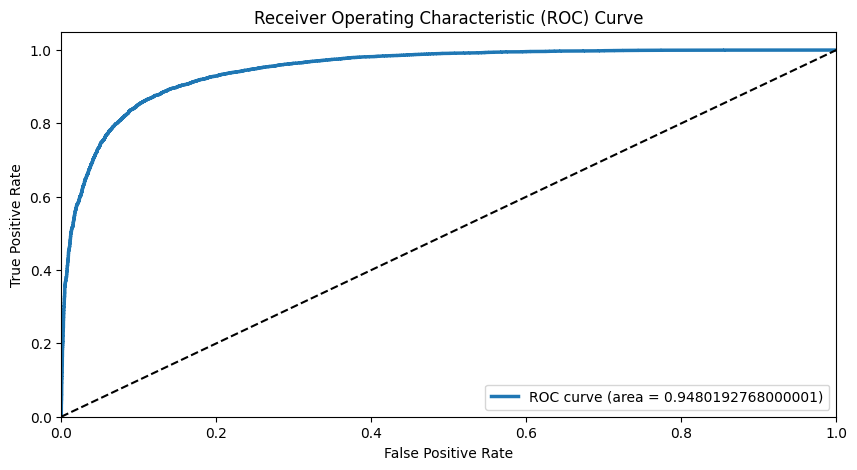

In [16]:
evaluation.get_performance(predictions = X_test_pred, y_test = y_test_pickle)

print('----------------------------------------------------------------------------------------------------------------')

roc_auc = evaluation.plot_roc(model = lr, y_test = y_test_pickle, features = X_test_vect)


Let's check that the `get_performance` function returns the metrics correctly. For that we are going to simulate input/output data of a model.

In [17]:
def check_basic_metrics():
    accuracy, precision, recall, f1_score = evaluation.get_performance(
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0], 
        [1, 1, 1, 0, 0, 1, 1, 0, 0, 0]
    )
    
    if (accuracy, precision, recall, f1_score) == (0.6, 0.6, 0.6, 0.6):
        print('Success!')
    else:
        raise ValueError('You must check your get_performance function!')
        
check_basic_metrics()

Model Performance metrics:
------------------------------
Accuracy: 0.6
Precision: 0.6
Recall: 0.6
F1 Score: 0.6

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10


Prediction Confusion Matrix:
------------------------------
   1  0
1  3  2
0  2  3
Success!


Let's see if your model at least exceeds an ROC-AUC of 0.9

In [78]:
def check_roc(roc_auc):
    if roc_auc > 0.90: 
        print('Success!')
    else:
        raise ValueError('Your model is not good enough!')
        
check_roc(roc_auc)

Success!


---
## 5. Feature Engineering with Custom Word Embedding

### Tokenize x and train your own Word Embedding

You are going to have to train your own word embedding, for this we are going to use the __gensim__ library. 

[Here](https://radimrehurek.com/gensim/models/word2vec.html) you can read Gensim's Word2Vec documentation.

As a previous step to training your word embedding you must tokenize the corpus, this may take a bit depending on the size of the dataset and the tokenizer we use.

In [19]:
X_train_token = pd.Series(X_train_norm_pickle)
X_test_token = pd.Series(X_test_norm_pickle)

X_train_token = X_train_token.apply(nltk.word_tokenize)
X_test_token = X_test_token.apply(nltk.word_tokenize)

In [20]:
model_w2v = Word2Vec(
    X_train_token, vector_size = 100, min_count = 1, window = 20, sg = 1, workers = 4, seed = 42, negative = 50
    ) 

### Generate averaged word vector features

Once the embedding has been trained, we must use it. Remember that embedding will convert each word you pass to it into a vector of a given dimension (in our case $vector\_size=100$). So in order to obtain a vector for each review, you must average the vectors of all the words that are part of the same review.

The function must have the following form:
* `vectorizer(corpus, model, num_features=100)`


Where:
* `corpus:` corresponds to the entire dataset, in this way we obtain an average vector for each review, with a single call to the function.
* `model:` is your trained model.
* `num_features:` the dimension of the output vector of your embedding (remember that in our case we set this value to 100).

In [21]:
def vectorizer(corpus, model, num_features=100):

    corpus_vectors = []

    for sentence in corpus:
        vectors = [model.wv[word] for word in sentence if word in model.wv]
        if vectors:
            sentence_vectors = np.mean(vectors, axis = 0)
        else:
            sentence_vectors = np.zeros(num_features)

        corpus_vectors.append(sentence_vectors)

    return corpus_vectors

In [22]:
X_train_word2vec = vectorizer(X_train_token, model_w2v, num_features=100)

X_test_word2vec = vectorizer(X_test_token, model_w2v, num_features=100)

Let's do a simple check of the embedding that you just trained.

In [23]:
def check_embedding(model):
    vector = model.wv['computer']
    if len(vector) == 100:
        print(
            "Success! Your embedding tells me that 'women' and 'man' "
            f"are similar with a score of {model.wv.similarity('woman', 'man')}"
        )
    else:
        raise ValueError('You should check your embedding vector size!')
        
check_embedding(model_w2v)

Success! Your embedding tells me that 'women' and 'man' are similar with a score of 0.8153486847877502


Now, we are going to check the vectorizer, remember that the vectorizer must generate an average vector of all the words present in the same review. So we're going to get two vectors of two words and manually average them, then using those two words we'll simulate a tokenized sentence and see that it matches the manual way.

In [24]:
def check_vectorizer(model):
    vector1 = model.wv['personal']
    vector2 = model.wv['computer']
    avg = vectorizer([['personal', 'computer']], model)[0]

    if np.allclose((vector1 + vector2) / 2, avg):
        print('Success!')
    else:
        raise ValueError('You should check your vectorizer!')
        
check_vectorizer(model_w2v)

Success!


### Modeling

Finally train a new model, it can be the same one you used before and compare the results you got using BoW/TF-IDF and Word2Vec.

In addition to training the model

* `Accuracy`
* `Recall`
* `F1-Score`
* `Classification Report`
* `Confusion Matrix`
* `ROC Curve`
* `Obtain the ROC-AUC value (later we will do a small minimum performance check with this value)`

In [76]:
rf = LogisticRegression(C = 100, tol = 1e-4, max_iter = 1000)

rf.fit(X_train_word2vec, y_train_pickle)

X_train_pred_rf = rf.predict(X_train_word2vec)
X_test_pred_rf = rf.predict(X_test_word2vec)

Model Performance metrics:
------------------------------
Accuracy: 0.8272
Precision: 0.8369028006589786
Recall: 0.8128
F1 Score: 0.8246753246753247

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     12500
           1       0.84      0.81      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000


Prediction Confusion Matrix:
------------------------------
       1      0
1  10160   2340
0   1980  10520
----------------------------------------------------------------------------------------------------------------


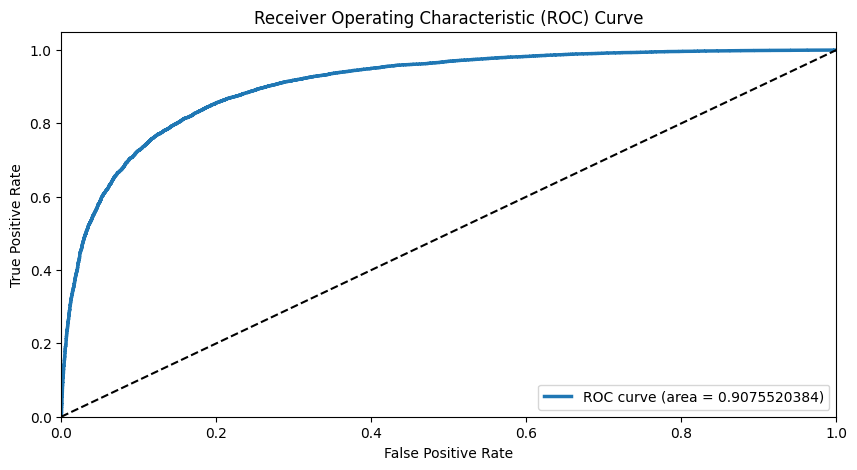

In [77]:
evaluation.get_performance(predictions = X_test_pred_rf, y_test = y_test_pickle)

print('----------------------------------------------------------------------------------------------------------------')

roc_auc = evaluation.plot_roc(model = rf, y_test = y_test_pickle, features = X_test_word2vec)

### *Don't change anything in this block, just make it run correctly*

In [79]:
check_roc(roc_auc)

Success!
